In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [2]:
data = pd.read_csv("data.csv", encoding='latin')
data.sample(8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
289723,562282,22382,LUNCH BAG SPACEBOY DESIGN,50,8/4/2011 10:38,1.65,13098.0,United Kingdom
54029,540848,22464,HANGING METAL HEART LANTERN,1,1/12/2011 9:26,3.36,NaN,United Kingdom
262376,559914,22083,PAPER CHAIN KIT RETROSPOT,1,7/13/2011 15:13,6.63,NaN,United Kingdom
44602,540185,22052,VINTAGE CARAVAN GIFT WRAP,25,1/5/2011 13:40,0.42,14653.0,United Kingdom
222849,556459,47480,HANGING PHOTO CLIP ROPE LADDER,1,6/10/2011 17:25,3.29,NaN,United Kingdom
527818,580727,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,8,12/5/2011 17:17,1.63,14096.0,United Kingdom
529266,580730,23289,DOLLY GIRL CHILDRENS BOWL,1,12/5/2011 17:28,2.46,NaN,United Kingdom
12766,537395,21872,GLAMOROUS MUG,2,12/6/2010 14:05,1.25,15356.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
for col in data.columns:
    msg = 'column: {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msg)#hapus null customerID karena isinya unique value semua dan juga karena missing value

column:  InvoiceNo	 percent of NaN value: 0.00%
column:  StockCode	 percent of NaN value: 0.00%
column: Description	 percent of NaN value: 0.27%
column:   Quantity	 percent of NaN value: 0.00%
column: InvoiceDate	 percent of NaN value: 0.00%
column:  UnitPrice	 percent of NaN value: 0.00%
column: CustomerID	 percent of NaN value: 24.93%
column:    Country	 percent of NaN value: 0.00%


In [5]:
data['CustomerID'].unique() #cek customerID

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [6]:
#CLEANING DATA
data.dropna(subset=['Description'], inplace=True)
data.dropna(subset=['CustomerID'], inplace=True)

In [7]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
print(data.duplicated().sum())#cek duplicated data
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

5225
0


In [9]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])#change dtype invoicedate

In [11]:
data['TotalPrice'] = data['UnitPrice'] * data['Quantity']
data.head().reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalPrice   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [14]:
cat = ['InvoiceNo', 'StockCode', 'Description','Country','InvoiceDate']
num = ['Quantity','UnitPrice','TotalPrice','CustomerID']

In [15]:
data[num].describe().style.background_gradient(axis=1,cmap=sns.light_palette('lawngreen', as_cmap=True))

,Quantity,UnitPrice,TotalPrice,CustomerID
count,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,20.613638,15281.160818
std,250.283037,69.764035,430.352218,1714.006089
min,-80995.000000,0.000000,-168469.600000,12346.000000
25%,2.000000,1.250000,4.250000,13939.000000
50%,5.000000,1.950000,11.700000,15145.000000
75%,12.000000,3.750000,19.800000,16784.000000
max,80995.000000,38970.000000,168469.600000,18287.000000


1. rata-rata banyaknya barang (kuantitas) 9.67 dengan median 3 sehingga bentuk distribusi skew dan pada variable harga per unit rata-rata pundsterling 4.645 dan nilai median 2.08 poundsterling sehingga bentuk distribusi juga skew
2. terdapat kejanggalan nilai minimum minus pada kedua varaible sehingga perlu dihapus

In [16]:
#cek nilai skew 
print("Skew: {}".format(data[num].skew())) 

Skew: Quantity        0.179957
UnitPrice     449.316245
TotalPrice     -0.058003
CustomerID      0.034215
dtype: float64


In [17]:
data = data[data['Quantity']>=0]
data = data[data['UnitPrice']>=0]
data = data[data['TotalPrice']>=0]
print(data.shape)

(392732, 9)


In [18]:
data[num].describe().style.background_gradient(axis=1,cmap=sns.light_palette('lawngreen', as_cmap=True))
#data sudah tidak ada nilai yang negatif

,Quantity,UnitPrice,TotalPrice,CustomerID
count,392732.000000,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,22.629195,15287.734822
std,181.588420,22.240725,311.083465,1713.567773
min,1.000000,0.000000,0.000000,12346.000000
25%,2.000000,1.250000,4.950000,13955.000000
50%,6.000000,1.950000,12.390000,15150.000000
75%,12.000000,3.750000,19.800000,16791.000000
max,80995.000000,8142.750000,168469.600000,18287.000000


In [19]:
data[cat].describe()

,InvoiceNo,StockCode,Description,Country,InvoiceDate
count,392732,392732,392732,392732,392732
unique,18536,3665,3877,37,17286
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2011-11-14 15:27:00
freq,542,2023,2016,349227,542
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00


1. negara dengan tempat tinggal setiap pelanggan paling banyak adalah inggris
2. WHITE HANGING HEART T-LIGHT HOLDER (kalung liontin) adalah item paling laris
3. 2011-11-14 15:27:00 waktu terpadat dalam transaksi
4. no. invoice terbanyak adalah 573585 	dan sepertinya perlu tindakan lanjut karena kemungkinan untuk setiap pelanggan diberikan no.invoice yang berbeda

In [20]:
for col in cat: #berikut adalah sebaran nilainya
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom InvoiceNo:
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
539005      1
548629      1
573995      1
557800      1
537194      1
Name: InvoiceNo, Length: 18536, dtype: int64

Value count kolom StockCode:
85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
          ... 
21895        1
85224        1
90130A       1
90176C       1
84016        1
Name: StockCode, Length: 3665, dtype: int64

Value count kolom Description:
WHITE HANGING HEART T-LIGHT HOLDER     2016
REGENCY CAKESTAND 3 TIER               1714
JUMBO BAG RED RETROSPOT                1615
ASSORTED COLOUR BIRD ORNAMENT          1395
PARTY BUNTING                          1390
                                       ... 
PURPLE FRANGIPANI HAIRCLIP                1
JET BLACK LAS VEGAS BRACELET ROUND        1
ORANGE PENDANT TRIPLE SHELL NECKLAC       1
BIRD ON BRANCH CANVAS SCREEN              1
WHITE/PINK MINI CRYSTALS NECKLACE         1
Name: Description

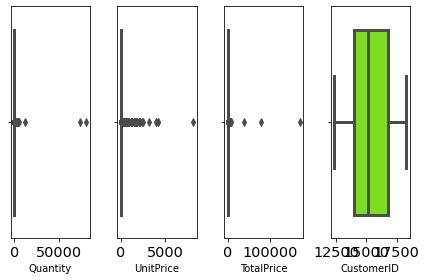

In [21]:
#UNIVARIATE ANALYSIS : untuk analysis satu variable sehingga dapat melihat karakteristiknya
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(data[num[i]], color='lawngreen', orient='h')
    plt.tight_layout() 

<Figure size 864x360 with 0 Axes>

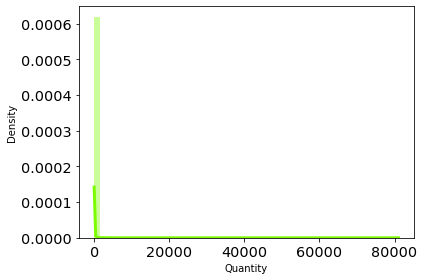

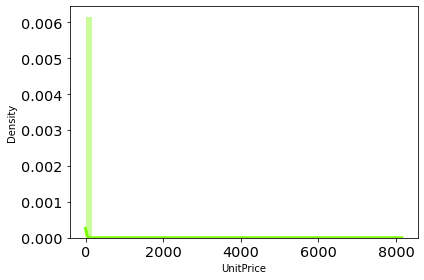

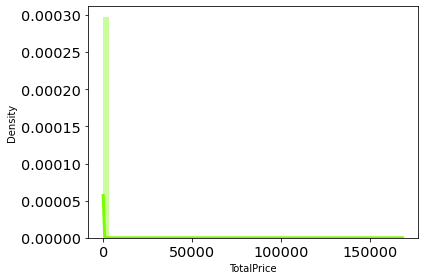

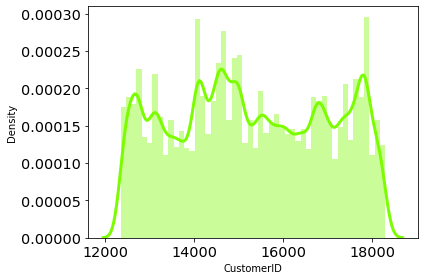

In [22]:
plt.figure(figsize=(12, 5))
for i in range(0, len(num)):
    plt.figure()
    sns.distplot(data[num[i]], color='lawngreen')
    plt.tight_layout()

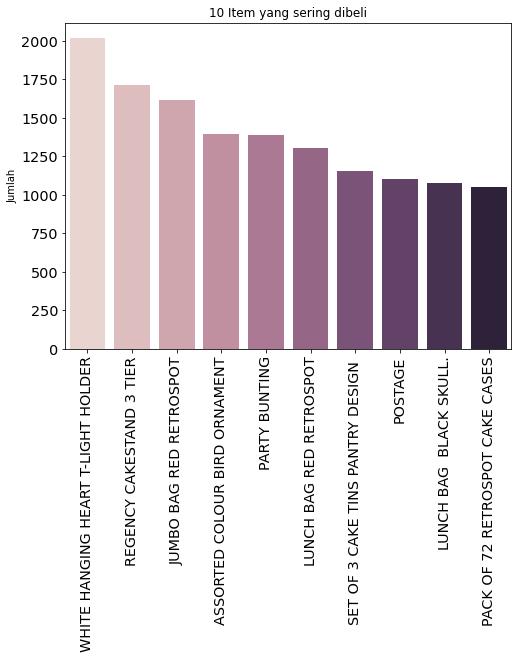

In [24]:
item_counts = data['Description'].value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(8,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(10))
plt.ylabel("Jumlah")
plt.title("10 Item yang sering dibeli");
plt.xticks(rotation=90);

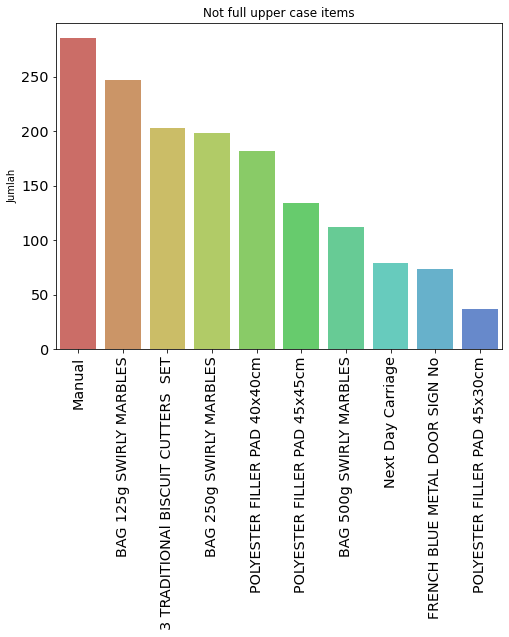

In [25]:
lcase_counts = data[~data['Description'].str.isupper()]['Description'].value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(8,6))
sns.barplot(lcase_counts.index, lcase_counts.values, palette=sns.color_palette("hls", 15))
plt.ylabel("Jumlah")
plt.title("Not full upper case items");
plt.xticks(rotation=90);

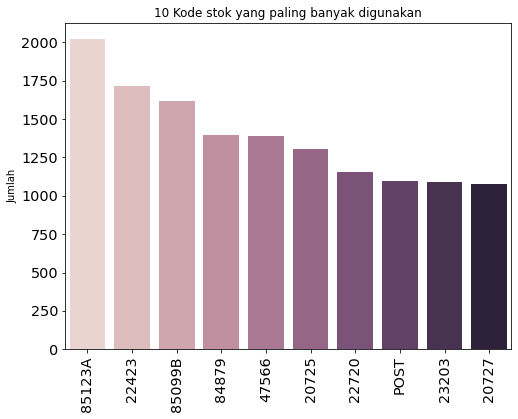

In [26]:
stock_counts = data['StockCode'].value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(8,6))
sns.barplot(stock_counts.index, stock_counts.values, palette = sns.cubehelix_palette(10))
plt.ylabel("Jumlah")
plt.title("10 Kode stok yang paling banyak digunakan");
plt.xticks(rotation=90);

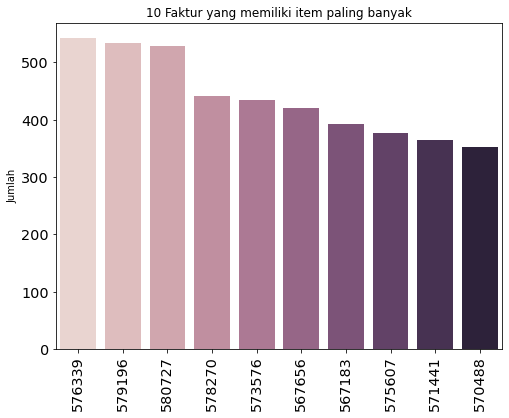

In [27]:
inv_counts = data['InvoiceNo'].value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(8,6))
sns.barplot(inv_counts.index, inv_counts.values, palette=sns.cubehelix_palette(10))
plt.ylabel("Jumlah")
plt.title("10 Faktur yang memiliki item paling banyak");
plt.xticks(rotation=90);

In [29]:
#EDA VISUALIZATION country
temp = data[['InvoiceNo', 'Country']].groupby(['InvoiceNo', 'Country']).count().sort_values("InvoiceNo",ascending = False)
temp = temp.reset_index()
temp.head()

,InvoiceNo,Country
0,581587,France
1,581586,United Kingdom
2,581585,United Kingdom
3,581584,United Kingdom
4,581583,United Kingdom


In [30]:
countries = temp['Country'].value_counts()
print('jumlah negara dalam dataset: {}'.format(len(countries)))

jumlah negara dalam dataset: 37


In [31]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

data1 = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'jumlah pesanan'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Jumlah pesanan per negara',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data1], layout = layout)
iplot(choromap, validate=False)

negara dengan jumlah pesananan terbanyak ada pada inggris disusul oleh germany dan france

In [32]:
pd.DataFrame([{'products': len(data['StockCode'].value_counts()),    
               'transactions': len(data['InvoiceNo'].value_counts()),
               'CustomerID': len(data['CustomerID'].value_counts()) 
              }], columns = ['products', 'transactions','CustomerID'], index = ['quantity'])

,products,transactions,CustomerID
quantity,3665,18536,4339


kuantitas produk yang dilakukan selama transaksi adalah 3665 dengan 18536 transaksi yang dilakukan oleh 4339 pelanggan

In [33]:
temp = data.groupby(by=['InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket[:15]
#jumlah produk yang dibeli di setiap transaksi

,InvoiceNo,Number of products
0,536365,7
1,536366,2
2,536367,12
3,536368,4
4,536369,1
5,536370,20
6,536371,1
7,536372,2
8,536373,16
9,536374,1


In [34]:
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))
display(nb_products_per_basket[:5])
#______________________________________________________________________________________________
n1 = nb_products_per_basket['order_canceled'].sum()
n2 = nb_products_per_basket.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

,InvoiceNo,Number of products,order_canceled
0,536365,7,0
1,536366,2,0
2,536367,12,0
3,536368,4,0
4,536369,1,0


Number of orders canceled: 0/18536 (0.00%) 


In [35]:
data[['InvoiceNo','Country','CustomerID','TotalPrice']].sort_values('TotalPrice',ascending = False).head(15)
#jumlah harga yang dibeli oleh setiap pelanggan

,InvoiceNo,Country,CustomerID,TotalPrice
540421,581483,United Kingdom,16446.0,168469.60
61619,541431,United Kingdom,12346.0,77183.60
222680,556444,United Kingdom,15098.0,38970.00
173382,551697,United Kingdom,16029.0,8142.75
348325,567423,United Kingdom,17450.0,7144.72
52711,540815,United Kingdom,15749.0,6539.40
160546,550461,United Kingdom,15749.0,6539.40
421601,573003,Netherlands,14646.0,4992.00
52709,540815,United Kingdom,15749.0,4921.50
160542,550461,United Kingdom,15749.0,4632.00


Analisis RFM

Analisis RFM (Recency, Frequency, Monetary) adalah teknik segmentasi pelanggan yang menggunakan perilaku pembelian sebelumnya untuk membagi pelanggan menjadi beberapa kelompok. RFM membantu membagi pelanggan ke dalam berbagai kategori atau kelompok untuk mengidentifikasi pelanggan yang lebih cenderung menanggapi promosi dan juga untuk layanan personalisasi di masa mendatang.

RECENCY (R): Hari sejak pembelian terakhir

FREQUENCY (F): Jumlah total pembelian

NILAI MONETER (L): Total uang yang dibelanjakan pelanggan ini. Kami akan membuat 3 atribut pelanggan tersebut untuk setiap pelanggan.



RECENCY : Untuk menghitung keterkinian, kita perlu memilih titik tanggal untuk mengevaluasi berapa hari yang lalu adalah pembelian terakhir pelanggan.

In [41]:
data['Date'] = data['InvoiceDate'].apply(lambda x: x.date())
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [42]:
data['Month']=data['InvoiceDate'].apply(lambda x:x.month)
data['Year']=data['InvoiceDate'].apply(lambda x:x.year)
data=data.sort_values(by=['Year','Month'])

mmap={1:'Jan11',2:'Feb11',3:'Mar11',4:'Apr11', 5:'May11', 6:'Jun11', 7:'Jul11',8:'Aug11',9:'Sep11',10:'Oct11',11:'Nov11',12:'Dec11'}
data['Month_name']=data['Month'].map(mmap)

In [43]:
def my(x):
    Month=x[0]
    Year=x[1]
    
    if Year==2010:
        Month='Dec10'
        return Month
    else:
        return Month

In [44]:
data['Month_name']=data[['Month_name','Year']].apply(my, axis=1)

In [45]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date,Month,Year,Month_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,12,2010,Dec10
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,Dec10
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,12,2010,Dec10
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,Dec10
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,Dec10


In [46]:
#Total Transaction's monthly
monthly=data.groupby(['Year','Month','Month_name']).sum()
monthly.head()

Quantity  UnitPrice   CustomerID  TotalPrice
Year Month Month_name                                              
2010 12    Dec10         311063  80679.600  398415793.0  570422.730
2011 1     Jan11         348522  66234.650  318108588.0  568101.310
     2     Feb11         265043  62619.480  301745554.0  446084.920
     3     Mar11         347623  87864.790  407885218.0  594081.760
     4     Apr11         291369  78543.481  342693435.0  468374.331

In [47]:
#recency dataframe
recency_df = data.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head(5)

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [49]:
import time
import datetime as dt
current = dt.date(2021,12,1)
print(current)

2021-12-01


In [50]:
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (current - x).days)
recency_df.drop('LastPurchaseDate',axis = 1,inplace=True)
recency_df.head(5)

,CustomerID,Recency
0,12346.0,3970
1,12347.0,3647
2,12348.0,3720
3,12349.0,3663
4,12350.0,3955


Frequency

Frekuensi membantu kami mengetahui berapa kali pelanggan membeli dari kami. Untuk melakukan itu kita perlu memeriksa berapa banyak invoice yang didaftarkan oleh pelanggan yang sama.

In [51]:
temp1 = data.copy()
temp1.drop_duplicates(['InvoiceNo','CustomerID'],keep='last',inplace=True)
frequency_df = temp1.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


MONETARY

Atribut moneter menjawab pertanyaan: Berapa banyak uang yang dihabiskan pelanggan dari waktu ke waktu?

Untuk melakukan itu, pertama, kita akan membuat kolom baru total biaya untuk mendapatkan harga total per faktur

In [54]:
monetary_df = data.groupby(by = 'CustomerID',as_index=False).agg({'TotalPrice':'sum'})
monetary_df.columns = ['CustomerID','TotalPrice']
monetary_df.head(8)

,CustomerID,TotalPrice
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
5,12352.0,2506.04
6,12353.0,89.00
7,12354.0,1079.40


In [87]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)    

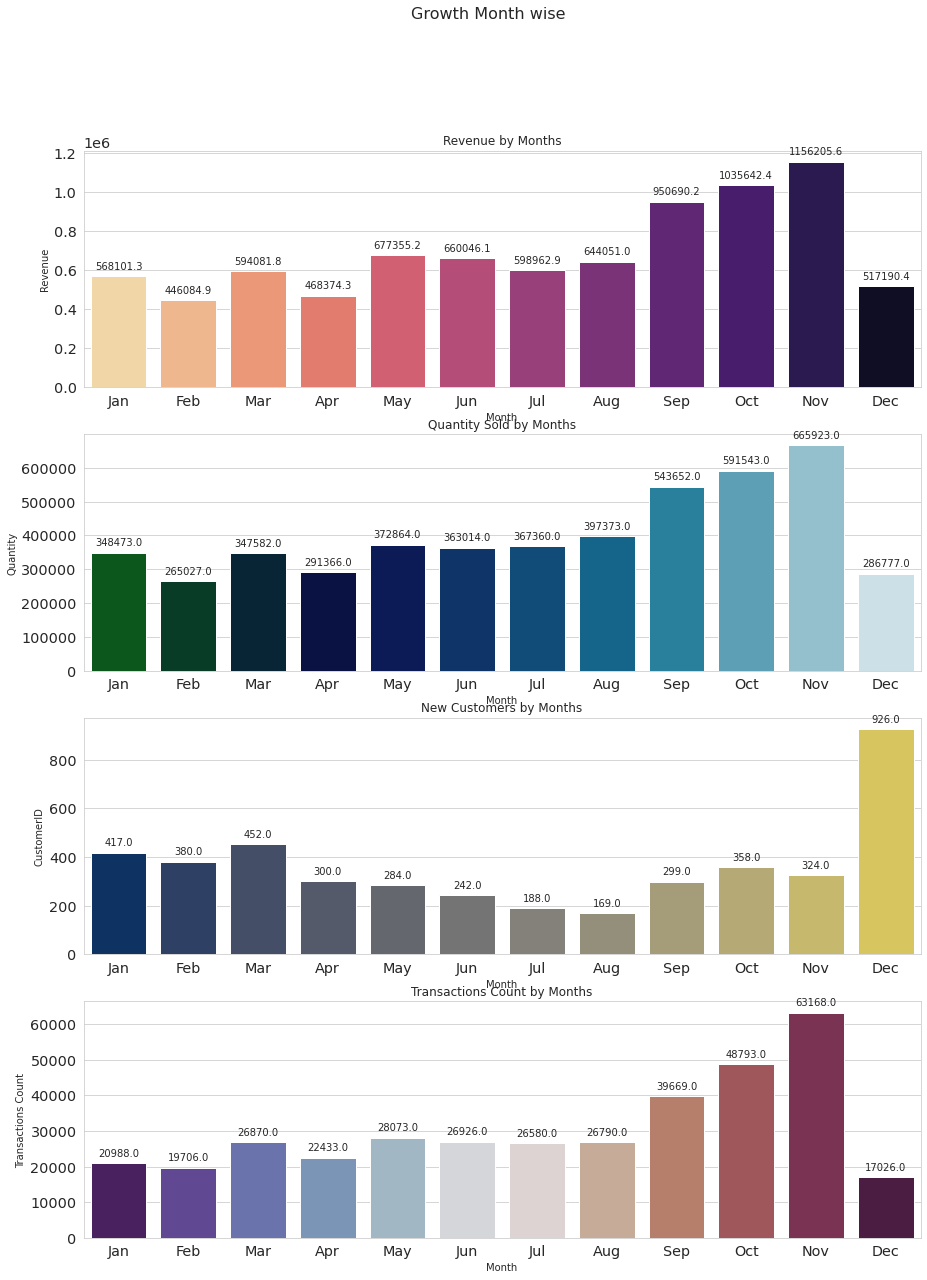

In [88]:
import calendar
fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(15,20))
rev = data[(data['TotalPrice']>0)&(data['InvoiceDate'].dt.year==2011)]
rev['Transactions Count'] = 1
rev = rev.groupby(rev['InvoiceDate'].dt.month).agg({'TotalPrice':'sum',
                                                  'Quantity': 'sum',
                                                  'CustomerID': 'count',
                                                'Transactions Count':'sum'})
rev = rev.reset_index()
rev['Month'] = rev['InvoiceDate'].apply(lambda x: calendar.month_abbr[x])
rev = rev.rename({'TotalPrice':'Revenue'},axis=1)
cust = data.groupby('CustomerID').first().reset_index()[['CustomerID','InvoiceDate']]
cust = cust.groupby(cust.InvoiceDate.dt.month).agg({'CustomerID':'count'})
cust = cust.reset_index()
cust['Month'] = cust['InvoiceDate'].apply(lambda x: calendar.month_abbr[x])


sns.set_style("whitegrid")
sns.barplot(data=rev, x=rev.Month, y='Revenue', palette='magma_r', ax=ax[0])
ax[0].title.set_text('Revenue by Months')
add_value_labels(ax[0])

sns.barplot(data=rev, x=rev.Month, y='Quantity',  palette='ocean', ax=ax[1])
ax[1].title.set_text('Quantity Sold by Months')
add_value_labels(ax[1])

sns.barplot(data=cust, x=cust.Month, y='CustomerID',  palette='cividis', ax=ax[2])
ax[2].title.set_text('New Customers by Months')
fig.suptitle('Growth Month wise',fontsize=16)
add_value_labels(ax[2])

sns.barplot(data=rev, x=rev.Month, y='Transactions Count',  palette='twilight_shifted', ax=ax[3])
ax[3].title.set_text('Transactions Count by Months')
fig.suptitle('Growth Month wise',fontsize=16)
add_value_labels(ax[3])

plt.show()

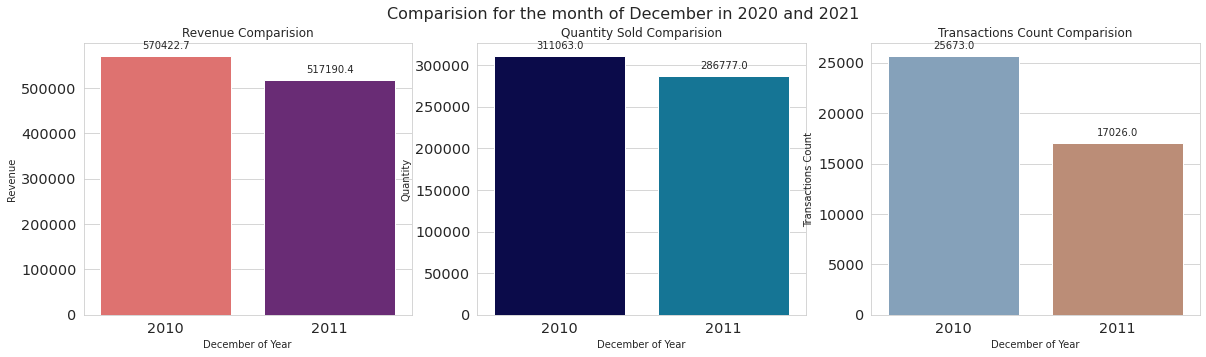

In [89]:
sales_comp = data[(data['InvoiceDate'].dt.month==12)&(data['TotalPrice']>=0)][['InvoiceDate','TotalPrice','Quantity']]
sales_comp['Transactions Count'] = 1
sales_comp = sales_comp.groupby(sales_comp['InvoiceDate'].dt.year)[['TotalPrice','Quantity','Transactions Count']].sum()
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

sns.set_style("whitegrid")
sns.barplot(data=sales_comp, x=sales_comp.index, y='TotalPrice', palette='magma_r', ax=ax[0])
ax[0].title.set_text('Revenue Comparision')
ax[0].set_ylabel('Revenue')
ax[0].set_xlabel('December of Year')
add_value_labels(ax[0])

sns.barplot(data=sales_comp, x=sales_comp.index, y='Quantity',  palette='ocean', ax=ax[1])
ax[1].title.set_text('Quantity Sold Comparision')
add_value_labels(ax[1])
ax[1].set_xlabel('December of Year')

sns.barplot(data=sales_comp, x=sales_comp.index, y='Transactions Count',  palette='twilight_shifted', ax=ax[2])
ax[2].title.set_text('Transactions Count Comparision')
add_value_labels(ax[2])
ax[2].set_xlabel('December of Year')

fig.suptitle('Comparision for the month of December in 2020 and 2021',fontsize=16)

plt.show()

In [90]:
print("Sales Revenue Difference: {:2.2f}% decline in revenue from 2010 \nSales Quantity Difference: {:2.2f}% decline in quantity from 2010".format(
((sales_comp['TotalPrice'][2010] - sales_comp['TotalPrice'][2011]) / sales_comp['TotalPrice'][2010])*100,
    ((sales_comp['Quantity'][2010] - sales_comp['Quantity'][2011]) / sales_comp['Quantity'][2010])*100))

Sales Revenue Difference: 9.33% decline in revenue from 2010 
Sales Quantity Difference: 7.81% decline in quantity from 2010


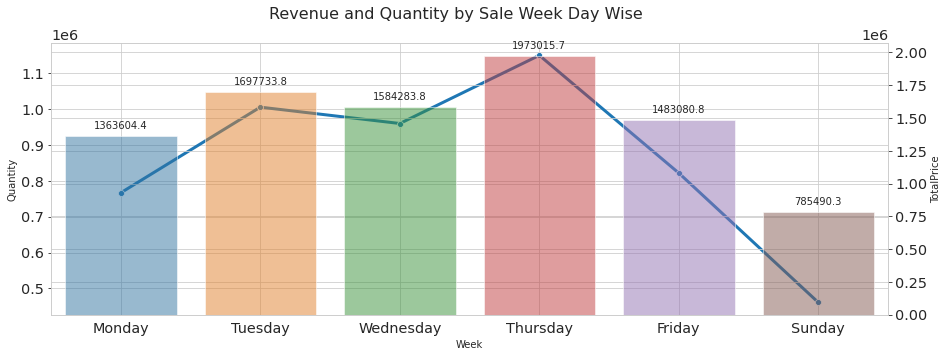

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,5))
sns.set_style("whitegrid")

week = data[data['TotalPrice']>=0][['InvoiceDate','TotalPrice','Quantity']]
week = week.groupby(week['InvoiceDate'].dt.weekday)[['TotalPrice','Quantity']].sum()
week = week.reset_index()
week['Week'] = week['InvoiceDate'].apply(lambda x: calendar.day_name[x])

sns.lineplot(data = week, x=week.Week, y='Quantity', marker='o', sort = False, ax=ax)
ax2 = ax.twinx()
sns.barplot(data = week, x=week.Week, y='TotalPrice', alpha=0.5, ax=ax2)
fig.suptitle('Revenue and Quantity by Sale Week Day Wise',fontsize=16)
add_value_labels(ax2)

plt.show()

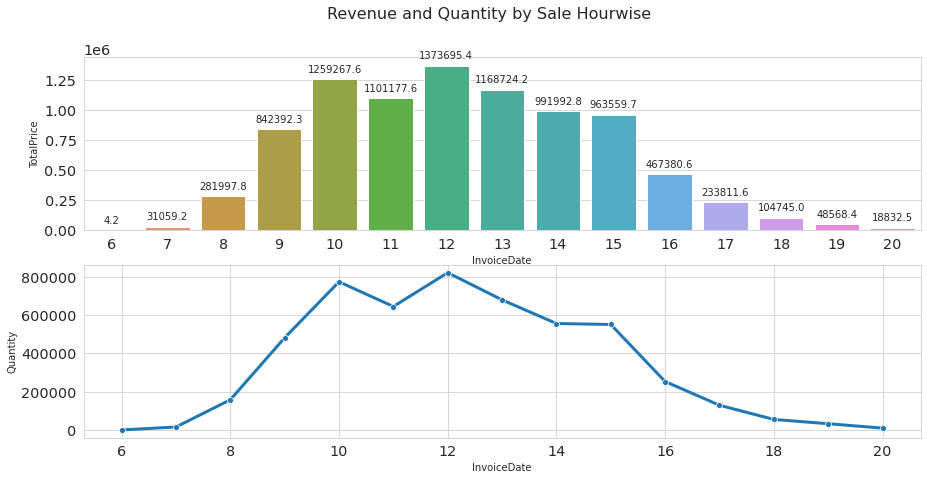

In [92]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(15,7))
sns.set_style("whitegrid")

day = data[data['TotalPrice']>=0][['InvoiceDate','TotalPrice','Quantity']]
day = day.groupby(day['InvoiceDate'].dt.hour)[['TotalPrice','Quantity']].sum()

sns.barplot(data = day, x=day.index, y='TotalPrice', alpha=1, ax=ax[0])
sns.lineplot(data = day, x=day.index, y='Quantity', marker='o', sort = False, ax=ax[1])
fig.suptitle('Revenue and Quantity by Sale Hourwise',fontsize=16)
add_value_labels(ax[0])
plt.show()

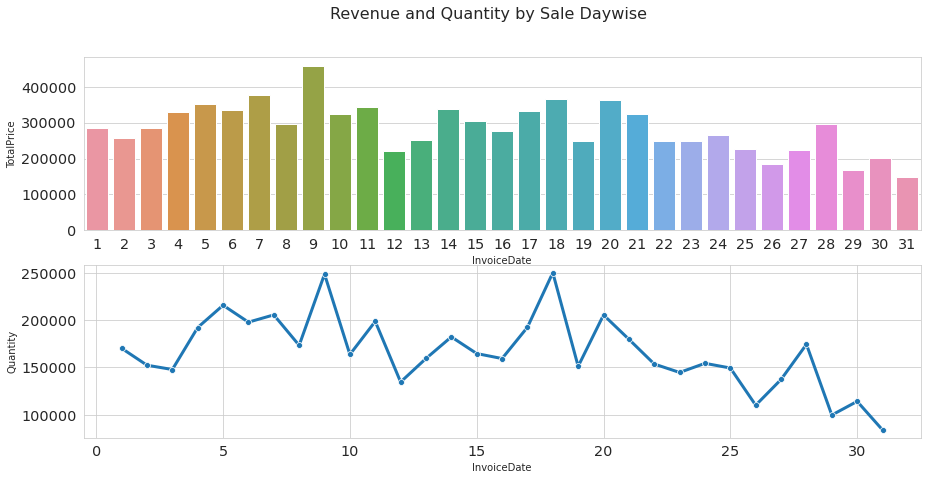

In [93]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(15,7))
sns.set_style("whitegrid")

date = data[data['TotalPrice']>=0][['InvoiceDate','TotalPrice','Quantity']]
date = date.groupby(date['InvoiceDate'].dt.day)[['TotalPrice','Quantity']].sum()

sns.barplot(data = date, x=date.index, y='TotalPrice', alpha=1, ax=ax[0])
sns.lineplot(data = date, x=date.index, y='Quantity', marker='o', sort = False, ax=ax[1])
fig.suptitle('Revenue and Quantity by Sale Daywise',fontsize=16)

plt.show()

In [99]:
pip install squarify

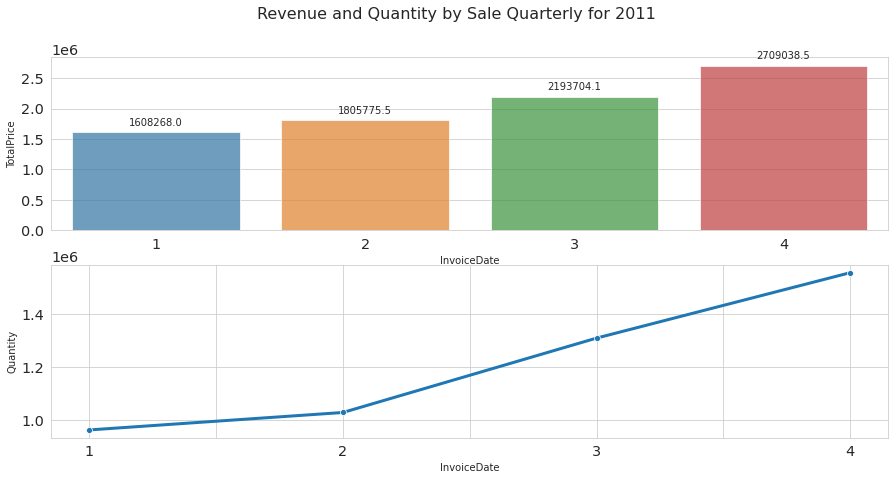

In [95]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(15,7))
sns.set_style("whitegrid")

q = data[(data['TotalPrice']>=0)&(data['InvoiceDate'].dt.year==2011)][['InvoiceDate','TotalPrice','Quantity']]
q = q.groupby(q['InvoiceDate'].dt.quarter)[['TotalPrice','Quantity']].sum()

sns.barplot(data = q, x=q.index, y='TotalPrice', alpha=0.7, ax=ax[0])
sns.lineplot(data = q, x=q.index, y='Quantity', marker='o', sort = False, ax=ax[1])
fig.suptitle('Revenue and Quantity by Sale Quarterly for 2011',fontsize=16)
add_value_labels(ax[0])
ax[1].set_xticklabels(['',1,'',2,'',3,'',4])
plt.show()

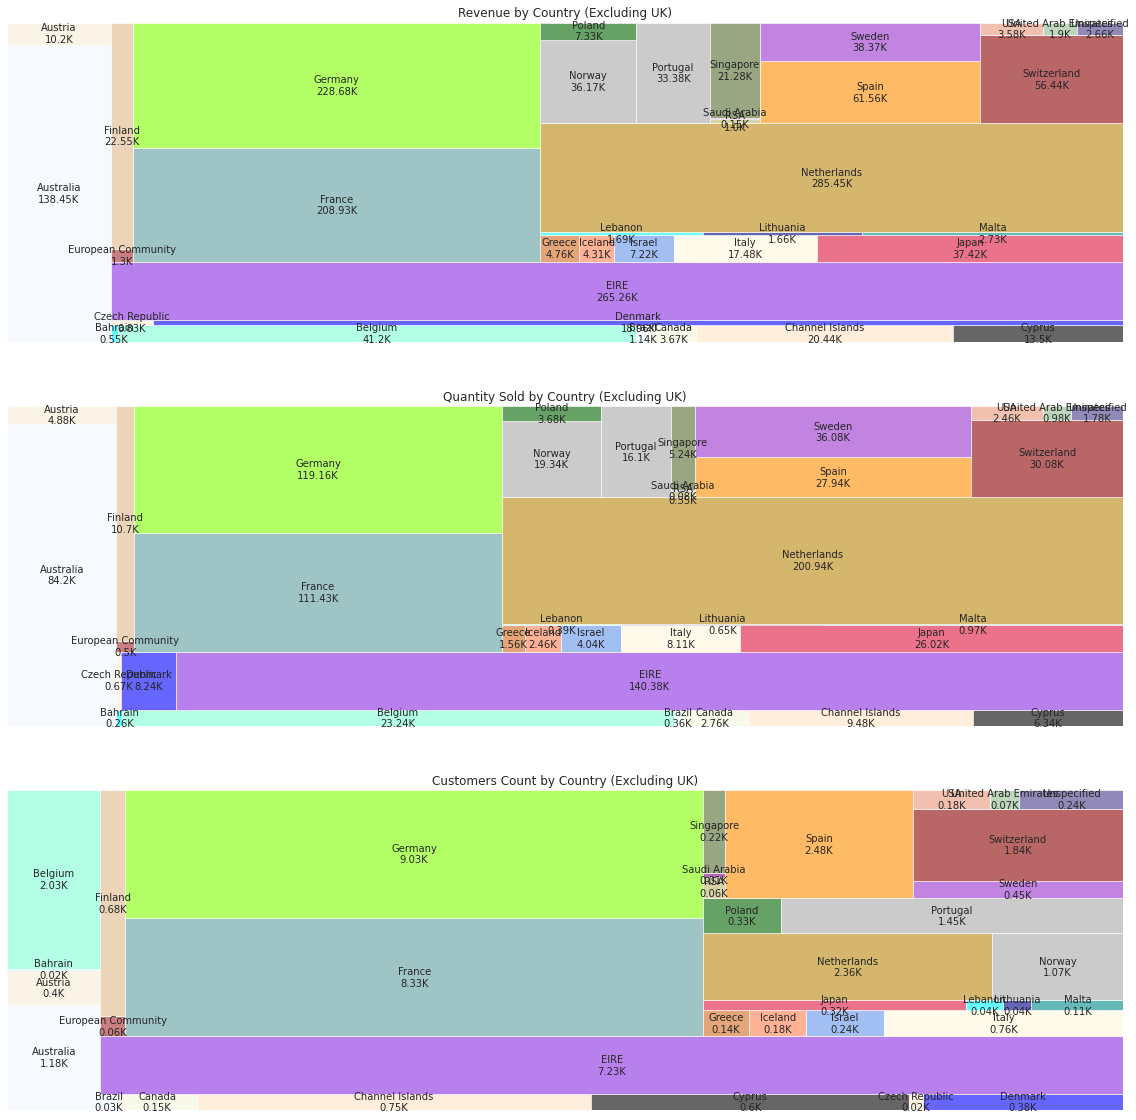

In [103]:
reg = data[data['TotalPrice']>=0].groupby('Country').agg({'TotalPrice':'sum',
                                                  'Quantity': 'sum',
                                                  'CustomerID': 'count'})
import squarify
import matplotlib.colors as mcolors

reg = reg[reg.index!='United Kingdom']
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,20))
# Change color
squarify.plot(sizes=reg['TotalPrice'], label=[str(x)+'\n'+str(y)+'K' for x,y in zip(reg.index,(reg['TotalPrice']/1000).round(2))], alpha=.6, ax=ax[0], color=mcolors.CSS4_COLORS )
ax[0].title.set_text('Revenue by Country (Excluding UK)')
squarify.plot(sizes=reg['Quantity'], label=[str(x)+'\n'+str(y)+'K' for x,y in zip(reg.index,(reg['Quantity']/1000).round(2))], alpha=.6, ax=ax[1], color=mcolors.CSS4_COLORS )
ax[1].title.set_text('Quantity Sold by Country (Excluding UK)')
r1 = reg[reg['CustomerID']!=0]
squarify.plot(sizes=r1['CustomerID'], label=[str(x)+'\n'+str(y)+'K' for x,y in zip(r1.index,(r1['CustomerID']/1000).round(2))], alpha=.6, ax=ax[2], color=mcolors.CSS4_COLORS )
ax[2].title.set_text('Customers Count by Country (Excluding UK)')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

In [56]:
#create RFM TABLE
rfm_df = recency_df.merge(frequency_df,on='CustomerID').merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head(5).reset_index()

,CustomerID,Recency,Frequency,TotalPrice
0,12346.0,3970,1,77183.60
1,12347.0,3647,7,4310.00
2,12348.0,3720,4,1797.24
3,12349.0,3663,1,1757.55
4,12350.0,3955,1,334.40


             Recency  Frequency  TotalPrice
Recency     1.000000  -0.260459   -0.121924
Frequency  -0.260459   1.000000    0.553223
TotalPrice -0.121924   0.553223    1.000000


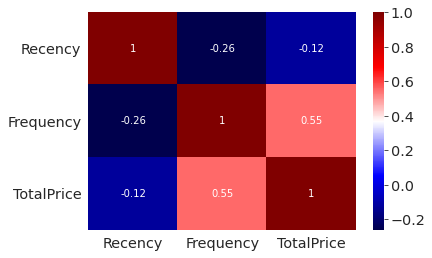

In [58]:
#create RFM VISUALIZATION
print(rfm_df.corr())
sns.heatmap(rfm_df.corr(),cmap="seismic",annot=True)

In [63]:
#going to PCA : scaling
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
rfm_df = pd.DataFrame(pt.fit_transform(rfm_df))
rfm_df.columns = rfm_df.columns 
rfm_df.head()

,0,1,2
0,0.0,-1.207532,3.177243
1,0.0,1.172690,1.378295
2,0.0,0.712547,0.749345
3,0.0,-1.207532,0.732725
4,0.0,-1.207532,-0.586331


Model RFM dapat digunakan bersama dengan model prediktif tertentu seperti pengelompokan K-means, Regresi Logistik, dan Mesin Rekomendasi untuk menghasilkan hasil informatif yang lebih baik tentang perilaku pelanggan.

menggunakan k-means

In [65]:
#Menerapkan PCA untuk mengurangi dimensi dan korelasi antara fitur Frekuensi dan Moneter.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
rfm_scaled = sc.fit_transform(rfm_df)
rfm_scaled

array([[ 0.        , -1.20753202,  3.1772428 ],
       [ 0.        ,  1.17268991,  1.37829524],
       [ 0.        ,  0.71254741,  0.74934503],
       ...,
       [ 0.        , -0.10619405, -1.13270713],
       [ 0.        ,  1.61085767,  0.84509149],
       [ 0.        ,  0.41039543,  0.76571572]])

In [66]:
from sklearn.decomposition import PCA
pca = PCA()
pca_tranformed_data = pca.fit_transform(rfm_scaled)
pca.components_

array([[-0.        , -0.70710678, -0.70710678],
       [ 0.        ,  0.70710678, -0.70710678],
       [ 1.        ,  0.        ,  0.        ]])

In [67]:
pca.explained_variance_

array([1.77665322, 0.22380783, 0.        ])

In [68]:
var_exp = pca.explained_variance_ratio_
var_exp

array([0.88812188, 0.11187812, 0.        ])

In [69]:
X = rfm_df.copy()
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(df_pca)
df_pca.head(5)

,0,1
0,-1.392796,-3.100504
1,-1.803819,-0.145385
2,-1.033714,-0.026020
3,0.335739,-1.371969
4,1.268452,-0.439256


In [70]:
#K-Means Clustering
X = df_pca.copy()

from sklearn.cluster import KMeans 

cluster_range = range(1, 15)
cluster_errors = []
cluster_sil_scores = []

for num in cluster_range: 
    clusters = KMeans(num, n_init = 100,init='k-means++',random_state=0)
    clusters.fit(X)
    # capture the cluster lables
    labels = clusters.labels_  
    # capture the centroids
    centroids = clusters.cluster_centers_ 
    # capture the intertia
    cluster_errors.append( clusters.inertia_ )    
clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,8678.000000
1,2,3148.724095
2,3,1956.745980
3,4,1499.751218
4,5,1129.236760
5,6,948.303260
6,7,821.800474
7,8,703.370900
8,9,616.792982
9,10,541.679048


Text(0, 0.5, 'error')

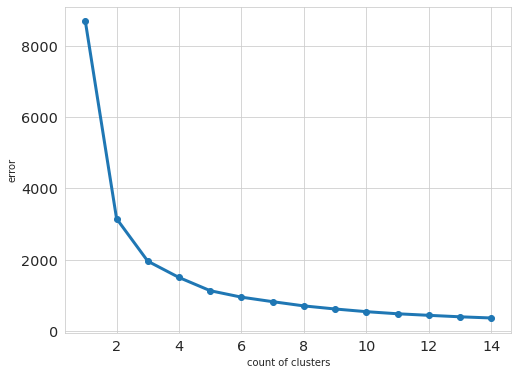

In [71]:
plt.figure(figsize=(8,6))
plt.plot(clusters_df["num_clusters"],clusters_df["cluster_errors"],marker = 'o')
plt.xlabel('count of clusters')
plt.ylabel('error')

In [74]:
from sklearn.metrics import silhouette_samples,silhouette_score
for num in range(2,10):
    clusters = KMeans(n_clusters=num,random_state=0)
    labels = clusters.fit_predict(df_pca)
    
    sil_avg = silhouette_score(df_pca, labels)
    print('For',num,'The Silhouette Score is =',sil_avg)

For 2 The Silhouette Score is = 0.5327280057106702
For 3 The Silhouette Score is = 0.4866396177711425
For 4 The Silhouette Score is = 0.4658268299195324
For 5 The Silhouette Score is = 0.44695292491874405
For 6 The Silhouette Score is = 0.435083765451204
For 7 The Silhouette Score is = 0.44762760359817594
For 8 The Silhouette Score is = 0.43299700133015384
For 9 The Silhouette Score is = 0.45238284453920424


pengurangan yang signifikan pada kesalahan cluster karena jumlah cluster meningkat dari 2 menjadi 4 dan setelah 4, pengurangannya tidak banyak.
kita pilih n = 4

In [75]:
kmeans = KMeans(n_clusters = 4)
kmeans = kmeans.fit(df_pca)
labels = kmeans.predict(df_pca)
centroids = kmeans.cluster_centers_

print(labels)
print()
print('Cluster Centers')
print(centroids)

[2 2 2 ... 3 2 1]

Cluster Centers
[[ 1.09284526 -0.6148629 ]
 [-0.14081804  0.19245817]
 [-1.64099801  0.01078904]
 [ 1.78755453  0.23241065]]


In [79]:
df_pca['Clusters'] = labels
df_pca.sample(10)

,0,1,Clusters
2256,1.826065,0.118356,3
2974,1.325864,-0.381844,0
3614,-1.488350,0.395923,2
366,1.496667,-0.211041,3
2579,0.704023,0.553842,1
504,-2.277313,0.063738,2
3919,-1.479632,0.404641,2
2156,1.353144,-0.354564,0
323,0.207762,0.057581,1
510,-2.105201,0.048368,2


In [80]:
df_pca['Clusters'].value_counts()

1    1537
2    1236
0     799
3     767
Name: Clusters, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

X = df_pca[[0,1]]
Y = df_pca['Clusters']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=75, stratify=Y)

# instantiate the model
dc=DecisionTreeClassifier()
knn=KNeighborsClassifier(1)


m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[160   0   0   0]
 [  0 308   0   0]
 [  0   0 247   0]
 [  0   0   0 153]]


Accuracy of DecisionTreeClassifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       308
           2       1.00      1.00      1.00       247
           3       1.00      1.00      1.00       153

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



In [83]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[160   0   0   0]
 [  0 308   0   0]
 [  0   3 244   0]
 [  0   0   0 153]]


Accuracy of K-NeighborsClassifier: 99.65437788018433 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       0.99      1.00      1.00       308
           2       1.00      0.99      0.99       247
           3       1.00      1.00      1.00       153

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868

